In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
address='E:\\afitech\\Afitech PPML Datasets\\mtcars.csv'
cars=pd.read_csv(address)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
cars.shape

(32, 12)

In [4]:
cars.describe

<bound method NDFrame.describe of              Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4 

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
Unnamed: 0    32 non-null object
mpg           32 non-null float64
cyl           32 non-null int64
disp          32 non-null float64
hp            32 non-null int64
drat          32 non-null float64
wt            32 non-null float64
qsec          32 non-null float64
vs            32 non-null int64
am            32 non-null int64
gear          32 non-null int64
carb          32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
cars.tail()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [7]:
x=cars.iloc[:,[1,2,3,4,5,6,7,8,9,10]]
x

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4


In [8]:
y=cars.iloc[:,11]
y

0     4
1     4
2     1
3     1
4     2
5     1
6     4
7     2
8     2
9     4
10    4
11    3
12    3
13    3
14    4
15    4
16    4
17    1
18    2
19    1
20    1
21    2
22    2
23    4
24    2
25    1
26    2
27    2
28    4
29    6
30    8
31    2
Name: carb, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler1=StandardScaler()
scaler1.fit(x_train)

x_train=scaler1.transform(x_train)
x_test=scaler1.transform(x_test)

In [11]:
x_train

array([[ 0.88384576, -1.29707495, -0.75982083, -1.26420518,  0.25041594,
        -0.09061377,  1.20202386,  1.12815215, -0.81649658,  0.38769414],
       [-0.76485274,  1.01913032,  0.58135042,  0.01747749, -0.84718639,
         0.18661368, -0.27830109, -0.88640526, -0.81649658, -0.9969278 ],
       [-0.54980511,  1.01913032,  0.34091158,  0.45441477, -1.00979414,
         0.90514197, -0.22347424, -0.88640526, -0.81649658, -0.9969278 ],
       [ 0.34622669, -0.13897232,  0.18914522, -0.56510554, -0.98946817,
        -0.06232526,  0.8949935 ,  1.12815215, -0.81649658, -0.9969278 ],
       [ 2.31749663, -1.29707495, -1.33960243, -1.20594688,  1.04312873,
        -1.21083898,  0.91144156,  1.12815215,  1.22474487,  0.38769414],
       [-0.29891621, -0.13897232, -0.58162325, -0.37576606,  0.71791323,
         0.19227138,  0.59892851,  1.12815215, -0.81649658,  0.38769414],
       [ 0.59711559, -1.29707495, -1.08978477, -0.81270333,  0.57563144,
        -1.07505411,  0.43993065,  1.12815215

In [12]:
x_test

array([[ 0.04157588, -0.13897232, -0.77431537,  0.38159189,  0.10813416,
        -0.56586083, -1.26518439, -0.88640526,  1.22474487,  1.77231608],
       [-0.38851939,  1.01913032,  0.34091158,  0.45441477, -1.00979414,
         0.52041816, -0.11382054, -0.88640526, -0.81649658, -0.9969278 ],
       [-0.85445592,  1.01913032,  1.7409136 ,  1.18264356, -0.68457864,
         2.34785626, -0.21250887, -0.88640526, -0.81649658, -0.9969278 ],
       [-0.13763048,  1.01913032,  1.05881761,  0.38159189, -0.84718639,
         0.19227138, -0.43181627, -0.88640526, -0.81649658, -0.9969278 ],
       [ 0.36414732, -1.29707495, -0.98661775, -0.75444503,  0.27074191,
        -0.91098072,  1.20750655,  1.12815215, -0.81649658, -0.9969278 ],
       [ 2.58630617, -1.29707495, -1.40440155, -1.22051145,  1.3276923 ,
        -1.62385131,  1.14719701,  1.12815215,  1.22474487,  0.38769414],
       [ 1.95908391, -1.29707495, -1.36518103, -1.40985094,  2.7708361 ,
        -1.87279024,  0.39058648,  1.12815215

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier1=KNeighborsClassifier(n_neighbors=17)
classifier1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [14]:
y_pred=classifier1.predict(x_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0 2 0 0 0]
 [0 1 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.33      0.50      0.40         2
           3       0.00      0.00      0.00         1
           4       0.25      1.00      0.40         1
           6       0.00      0.00      0.00         1

    accuracy                           0.29         7
   macro avg       0.12      0.30      0.16         7
weighted avg       0.13      0.29      0.17         7



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
error=[]

In [17]:
for i in range(1,25,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    #!= refers to not equal to.

In [18]:
error

[0.42857142857142855,
 0.42857142857142855,
 0.5714285714285714,
 0.42857142857142855,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143,
 0.7142857142857143]

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Mean Error')

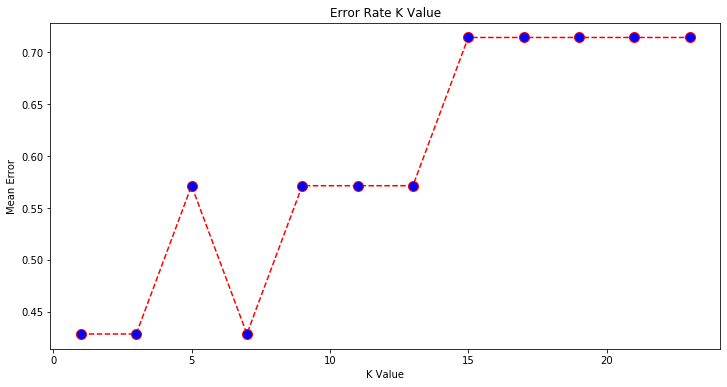

In [20]:
plt.figure(figsize=(12,6))
plt.plot(range(1,25,2),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')